In [45]:
import mapbox as mp
import pandas as pd
import geopandas as gp
import math
from shapely.geometry import Point
%matplotlib inline

In [65]:
def chunks(array, chunk_size):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(array), chunk_size):
        yield array[i:i + chunk_size]

In [140]:
def snap2road(pts_lon_lat):
    import mapbox as mp
    access = "pk.eyJ1Ijoic3VyYWpuYWlyIiwiYSI6ImNpdWoyZGQzYjAwMXkyb285b2Q5NmV6amEifQ.WBQAX7ur2T3kOLyi11Nybw"
    service = mp.MapMatcher(access_token=access)
    new_gps = []
    confidences = []
    durations = []
    for batch_pts in chunks(pts_lon_lat, 100):
        geojson = {'type': 'Feature',
                   'properties': {'coordTimes': []},
                   'geometry': {'type': 'LineString',
                                'coordinates': []}}
        geojson['geometry']['coordinates'] = batch_pts
        response = service.match(geojson, profile='mapbox.cycling')
        var = response.geojson()
        features = var['features']
        print len(features)
        try:
            assert len(features)==1, 'multiple features suggest poor snap to road quality'
            properties = features[0]['properties']
            confidences.append(properties['confidence'])
            durations.append(properties['duration'])
            new_gps.extend(features[0]['geometry']['coordinates'])
        except AssertionError:
            confidences.append('poor_quality')
            durations.append('poor_quality')
            new_gps.append('poor_quality')
            print 'error'
            
    return new_gps, confidences, durations

1
1
1
[2.047456182374674e-08, 0.9062500576684902, 0.9561367320158939] [975.8, 553.9, 21.1]


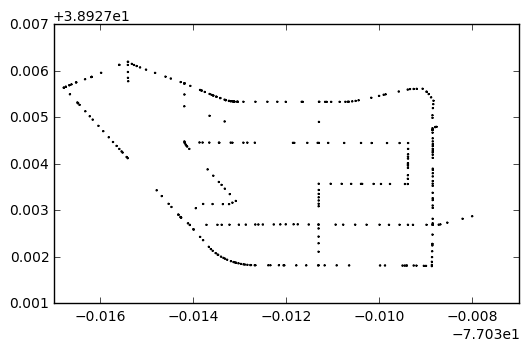

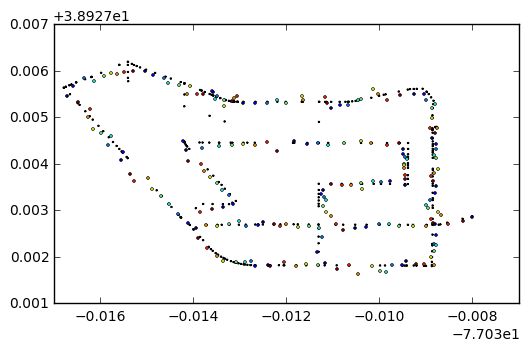

In [144]:
for i in range(4,5):
    i+=1
    data = gp.read_file('test_pts2segs{}.geojson'.format(i))
    gps = data.geometry.apply(lambda x: x.coords[0]).values
    gps_snap, conf, dur = snap2road(list(gps))
    print conf, dur
    gps_snap_gpdf = gp.GeoDataFrame([Point(x) for x in gps_snap],columns=['geometry'])
    gps_snap_gpdf.geometry = gps_snap_gpdf.buffer(0.00001)
    gps_snap_gpdf.plot()
    gps_snap_gpdf.append(data).plot()

In [130]:
gps_snap

[[[-77.041314, 38.928815],
  [-77.041572, 38.928815],
  [-77.041786, 38.928815],
  [-77.042044, 38.928815],
  [-77.042058, 38.928816],
  [-77.042158, 38.928817],
  [-77.042343, 38.928817],
  [-77.042387, 38.928817],
  [-77.042665, 38.928817],
  [-77.042678, 38.928818],
  [-77.042758, 38.928821],
  [-77.042774, 38.928822],
  [-77.042838, 38.928827],
  [-77.042891, 38.928833],
  [-77.042919, 38.928837],
  [-77.042974, 38.928847],
  [-77.043029, 38.928859],
  [-77.043079, 38.928871],
  [-77.043083, 38.928872],
  [-77.043109, 38.92888],
  [-77.043136, 38.928887],
  [-77.04319, 38.928905],
  [-77.043273, 38.928938],
  [-77.043319, 38.92896],
  [-77.043352, 38.928976],
  [-77.043403, 38.929003],
  [-77.043466, 38.929041],
  [-77.043475, 38.929047],
  [-77.04352, 38.929079],
  [-77.043583, 38.92913],
  [-77.043622, 38.929166],
  [-77.043665, 38.929215],
  [-77.043789, 38.929356],
  [-77.043853, 38.929428],
  [-77.043992, 38.929585],
  [-77.043999, 38.929594],
  [-77.044073, 38.929685],
  [-77

In [82]:
list_gps = []
for i in range(6):
    i+=1
    data = gp.read_file('test_pts2segs{}.geojson'.format(i))
    gps = data.geometry.apply(lambda x: x.coords[0]).tolist()
    list_gps.append(gps)

In [84]:
import datetime

In [100]:
import time
def work_every_sec(sec=1):
    sec = float(sec)
    stop = sec - time.time() % sec
    if stop>0.20:
        time.sleep(stop)
    else:
        time.sleep(0.20)

In [101]:
sleep = True

sd = datetime.datetime.now()
for i in range(200):
    ix = i % 6
    gps = list_gps[ix]
    gps_snap = snap2road(gps)
    if sleep:
        work_every_sec()
    if i % 20 == 0:
        print 'processed', i+1

ed = datetime.datetime.now()
print sd
print ed
print ed-sd
print (ed-sd).seconds

processed 1
processed 21
processed 41
processed 61
processed 81
processed 101
processed 121
processed 141
processed 161
processed 181
2017-02-07 15:34:54.636000
2017-02-07 15:38:16
0:03:21.364000
201


In [123]:
gps_snap2

([[[-77.039973, 38.903739],
   [-77.039931, 38.903739],
   [-77.039879, 38.903739],
   [-77.039801, 38.903739],
   [-77.039748, 38.903739],
   [-77.039662, 38.903739],
   [-77.039568, 38.903739],
   [-77.0395, 38.903739],
   [-77.039414, 38.90374],
   [-77.039407, 38.903739],
   [-77.039329, 38.90374],
   [-77.039299, 38.90374],
   [-77.03924, 38.90374],
   [-77.039168, 38.90374],
   [-77.039095, 38.90374],
   [-77.039036, 38.903741],
   [-77.039023, 38.903741],
   [-77.038898, 38.903741],
   [-77.038949, 38.903741],
   [-77.038777, 38.903741],
   [-77.038744, 38.903741],
   [-77.038647, 38.903741],
   [-77.038589, 38.903741],
   [-77.038562, 38.903741],
   [-77.038519, 38.903741],
   [-77.038515, 38.903742],
   [-77.038515, 38.903741],
   [-77.038515, 38.903778],
   [-77.038514, 38.903785],
   [-77.038514, 38.903844],
   [-77.038514, 38.903893],
   [-77.038514, 38.903975],
   [-77.038513, 38.904079],
   [-77.038513, 38.904135],
   [-77.038513, 38.904212],
   [-77.038513, 38.904257],
 

In [118]:
features = gps_snap2['features']
assert len(features)==1, 'multiple features suggest poor snap to road quality'
properties = features[0]['properties']
confidence = properties['confidence']
duration = properties['duration']
confidence, duration

(0.8744916679690088, 267.8)

In [112]:
gps_snap2

{u'code': u'Ok',
 u'features': [{u'geometry': {u'coordinates': [[-77.044189, 38.932807],
     [-77.044187, 38.932915],
     [-77.044186, 38.933007],
     [-77.044186, 38.933148],
     [-77.044186, 38.933184],
     [-77.044187, 38.933291],
     [-77.044187, 38.933357],
     [-77.044187, 38.933574],
     [-77.044187, 38.933674],
     [-77.044187, 38.933733],
     [-77.044187, 38.933803],
     [-77.044187, 38.93382],
     [-77.044187, 38.933903],
     [-77.044188, 38.933992],
     [-77.044188, 38.934126],
     [-77.044189, 38.934174],
     [-77.044188, 38.934262],
     [-77.044188, 38.934284],
     [-77.044185, 38.934332],
     [-77.044178, 38.93438],
     [-77.044164, 38.934429],
     [-77.044159, 38.934452],
     [-77.044142, 38.934498],
     [-77.044136, 38.934509],
     [-77.044105, 38.934573],
     [-77.044076, 38.934621],
     [-77.044052, 38.934653],
     [-77.044051, 38.934654],
     [-77.044026, 38.934691],
     [-77.043989, 38.934736],
     [-77.043954, 38.934776],
     [-77.043

In [109]:
try:
    assert 1!=1, 'assertion error'
except AssertionError as e:
    print e

assertion error
